In [81]:
# Importing Libraries
import ipywidgets as widgets
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math

In [82]:
# ----- Definitions -----

# duration
duration = widgets.BoundedIntText(
    value=12,
    min=1,
    max=24,
    step=1,
    description='Months:',
    layout=widgets.Layout(width='300px'),
    style={'description_width': '100px'},
    disabled=False
)

# inference rate
inference_rate = widgets.BoundedIntText(
    value = 1,
    min = 1,
    max = 800,
    step = 1,
    description = 'Inferences/Hour: ',
    layout=widgets.Layout(width='300px'),
    style={'description_width': '100px'},
    disabled = False
)

# battery type
battery_type = widgets.Dropdown(
    options=[('Li-Po', 0), ('Li-Ion', 1)],
    value= 0,
    description='Battery Type:',
    layout=widgets.Layout(width='300px'),
    style={'description_width': '100px'},
)

In [109]:
# ---- Request Params ----

# Request deployment duration
print("Please enter a deployment duration:")
display(duration)

# Request deployment duration
print("Please enter an inference rate:")
display(inference_rate)

# Request battery type
print("Please enter a battery type:")
display(battery_type)

Please enter a deployment duration:


BoundedIntText(value=12, description='Months:', layout=Layout(width='300px'), max=24, min=1, style=Description…

Please enter an inference rate:


BoundedIntText(value=1, description='Inferences/Hour: ', layout=Layout(width='300px'), max=800, min=1, style=D…

Please enter a battery type:


Dropdown(description='Battery Type:', layout=Layout(width='300px'), options=(('Li-Po', 0), ('Li-Ion', 1)), sty…

In [110]:
# ---- Display Info ----

print("========Selections========")
print(f"Inference Rate: {inference_rate.value} (inferences/hour)")
print(f"Duration: {duration.value} (months)")
print("==========================")

========Selections========
Inference Rate: 1 (inferences/hour)
Duration: 12 (months)


In [111]:
# ---- Ah calculations ----

# Baseline: 12.4 mA
# Mic: 10.2 mA
# Inference & mel spec: 2.6 mA
# SD write: 3 mA
# Piezo: 50 nA

# Active current = baseline + inference & mel spec + mic + SD write + piezo = ~28.20005mA
active_current = 28.20005/1000 # store in amps

# Idle current = standby mode current consumption = ~2.9mA
idle_current = 2.9/1000 # store in amps

# Convert duration from months to hours -> T_hours = T_months * 30.1467 days/month * 24 hr/day
duration_hours = duration.value * 30.1467 * 24

# Fractional representation of inference activations in an hour -> Inference Rate * (4 sec inference)/(3600 sec/hr)
active_inf = inference_rate.value * (4/3600)

# Amp Hours = T_hours * [(A_active * (I_rate * 4/3600) + (A_idle * (1 - (I_rate * 4/3600)))]
charge = duration_hours * ((active_current * active_inf) + idle_current * (1 - active_inf))

In [112]:
# ---- Battery Weight Calculations ----

# Energy (Wh) = charge (Ah) Nominal Voltage (V)
energy = charge * 3.3 

# Set energy density to average weight (kg) for selected battery type
energy_density = 250 if battery_type.value else 150

# Weight (Ibs) = Energy (Wh) / Energy Density (Wh/kg) * 2.205 (conversion factor)
weight = (energy/energy_density) * 2.205 # Convert to lbs

In [ ]:
# ---- SD Card Size Calculations ----

# Sample Rate = 16000 Hz
# Channels = 1
# Bit depth = 16 bits
# Inference duration = 4 seconds

# File size (Bytes) = (Sample Rate (Hz) * Duration (sec) * Channels (channel) * Bit Depth (bits/channel)) / Byte Conv (bits/byte)
file_size = (16000 * 4 * 1 * 16) / 8 

# SD size (Bytes) = File size (Bytes) * Inference rate (Inf/hr) * Duration (hr)
sd_size = (file_size * inference_rate.value * duration_hours) / 1000000000 # in GB

In [121]:
# ---- Fermi Estimations ----

# Fermi Estimations on Charge, Weight, and SD Card Size
print("\n========Fermi Estimations========\n")

print("Current Measurements (mA):")
print("Basline = 12.4 mA")
print(f"Mic = {10.2} mA")
print(f"Inference & Mel Spec = {2.6} mA")
print(f"SD Write = {3} mA")
print(f"Piezo = {50} nA")
print(f"Idle Current = {idle_current * 1000:.2f} mA\n")

print("Active Current Calculations (mA):")
print("Active Current = Baseline + Inference & Mel Spec + Mic + SD Write + Piezo")
print(f"Active Current = {active_current * 1000:.2f} mA\n")

print("Charge (Ah) Calculations:")
print("Duration (hr) = Duration (months) * 30.1467 days/month * 24 hr/day")
print(f"Duration (hr) = {duration_hours:.2f} hr")
print(f"Charge = Duration (hr) * [(Active Current (A) * 4/3600) + (Idle Current (A) * (1 - 4/3600))]")
print(f"Charge = {duration_hours:.2f} hr * [({active_current:.5f} A * {active_inf:.5f}) + ({idle_current:.5f} A * (1 - {active_inf:.5f}))]")
print(f"Charge: {charge:.2f} Ah\n")

print("Weight (Ibs) Calculations:")
print("Energy (Wh) = Charge (Ah) * Nominal Voltage (V)")
print(f"Energy (Wh) = {charge:.2f} Ah * 3.3 V")
print("Weight (Ibs) = Energy (Wh) / Energy Density (Wh/kg) * 2.205 (conversion factor)")
print(f"Weight (Ibs) = ({energy:.2f} Wh) / {energy_density} Wh/kg * 2.205")
print(f"Weight: {weight:.2f} lbs\n")

print("SD Card Size Calculations (GB):")
print("File Size (Bytes) = (Sample Rate (Hz) * Duration (sec) * Channels (channel) * Bit Depth (bits/channel)) / Byte Conv (bits/byte)")
print(f"File Size (Bytes) = (16000 Hz * 4 sec * 1 channel * 16 bits/channel) / 8")
print(f"File Size (Bytes) = {file_size} Bytes")
print("SD Size (GB) = File Size (Bytes) * Inference Rate (Inf/hr) * Duration (hr) / 1e9 (conversion to GB)")
print(f"SD Size (GB) = {file_size} Bytes * {inference_rate.value} Inf/hr * {duration_hours:.2f} hr / 1e9")
print(f"SD Size: {sd_size:.2f} GB\n")

print("=================================")


========Fermi Estimations========

Current Measurements (mA):
Basline = 12.4 mA
Mic = 10.2 mA
Inference & Mel Spec = 2.6 mA
SD Write = 3 mA
Piezo = 50 nA
Idle Current = 2.90 mA

Active Current Calculations (mA):
Active Current = Baseline + Inference & Mel Spec + Mic + SD Write + Piezo
Active Current = 28.20 mA

Charge (Ah) Calculations:
Duration (hr) = Duration (months) * 30.1467 days/month * 24 hr/day
Duration (hr) = 8682.25 hr
Charge = Duration (hr) * [(Active Current (A) * 4/3600) + (Idle Current (A) * (1 - 4/3600))]
Charge = 8682.25 hr * [(0.02820 A * 0.00111) + (0.00290 A * (1 - 0.00111))]
Charge: 25.42 Ah

Weight (Ibs) Calculations:
Energy (Wh) = Charge (Ah) * Nominal Voltage (V)
Energy (Wh) = 25.42 Ah * 3.3 V
Weight (Ibs) = Energy (Wh) / Energy Density (Wh/kg) * 2.205 (conversion factor)
Weight (Ibs) = (83.89 Wh) / 150 Wh/kg * 2.205
Weight: 1.23 lbs

SD Card Size Calculations (GB):
File Size (Bytes) = (Sample Rate (Hz) * Duration (sec) * Channels (channel) * Bit Depth (bits/cha

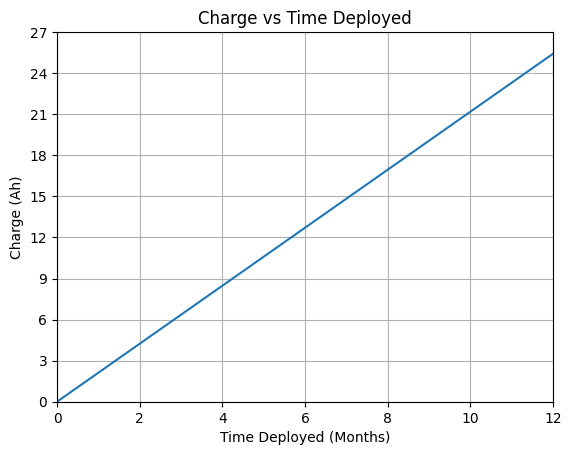

In [115]:
# ---- Amp Hours Plot ----

fig1, ax1 = plt.subplots()

# Add plot labels
plt.xlabel('Time Deployed (Months)')
plt.ylabel('Charge (Ah)')
plt.title("Charge vs Time Deployed")

# Estimate next "nice" number above charge value
locator = ticker.MaxNLocator(nbins='auto', integer=False)
ticks = locator.tick_values(0, charge) 
top_tick = ticks[ticks > charge][0]     

# set axis limit values and step range
ax1.set_xlim([0, duration.value])
ax1.set_ylim([0, top_tick])
ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins='auto', integer=True, prune=None))
ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins='auto', integer=False))

# plot x and y values
X = np.linspace(0, duration.value)
Y = np.linspace(0, charge)
plt.plot(X, Y)

# output the plot
plt.grid(True)
plt.show()

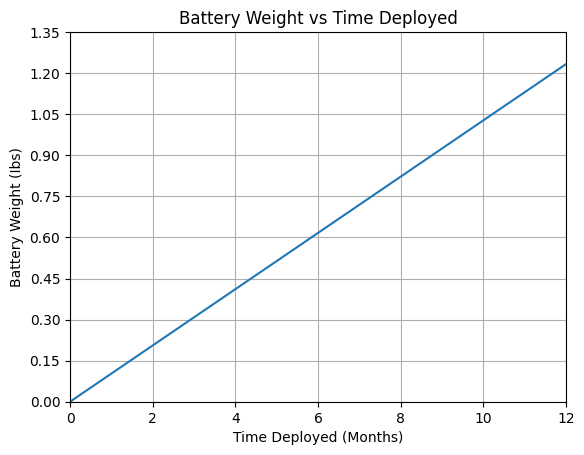

In [116]:
# ---- Battery Weight Plot ----

fig2, ax2 = plt.subplots()

# Add plot labels
plt.xlabel('Time Deployed (Months)')
plt.ylabel('Battery Weight (Ibs)')
plt.title("Battery Weight vs Time Deployed")

# Estimate next "nice" number above weight value
locator = ticker.MaxNLocator(nbins='auto', integer=False)
ticks = locator.tick_values(0, weight) 
top_tick = ticks[ticks > weight][0]  

# set axis limit values and step range
ax2.set_xlim([0, duration.value])
ax2.set_ylim([0, top_tick])
ax2.xaxis.set_major_locator(ticker.MaxNLocator(nbins='auto', integer=True, prune=None))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins='auto', integer=False, prune=None))

# plot x and y values
X = np.linspace(0, duration.value)
Y = np.linspace(0, weight)
plt.plot(X, Y)

# output the plot
plt.grid(True)
plt.show()

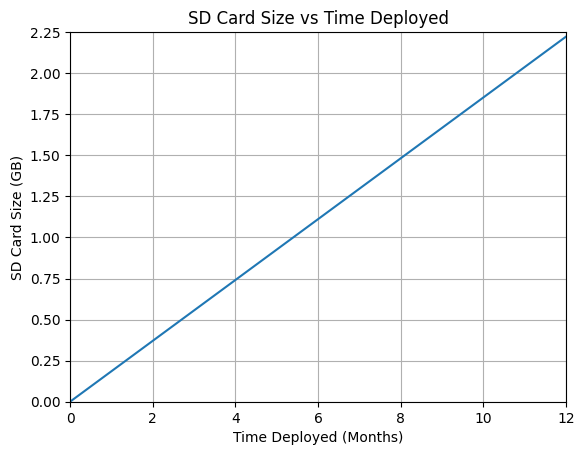

In [117]:
# ---- SD Card Size Plot ----

fig3, ax3 = plt.subplots()

# Add plot labels
plt.xlabel('Time Deployed (Months)')
plt.ylabel('SD Card Size (GB)')
plt.title("SD Card Size vs Time Deployed")

# Estimate next "nice" number above SD size value
locator = ticker.MaxNLocator(nbins='auto', integer=False)
ticks = locator.tick_values(0, sd_size) 
top_tick = ticks[ticks > sd_size][0]  

# set axis limit values and step range
ax3.set_xlim([0, duration.value])
ax3.set_ylim([0, top_tick])
ax3.xaxis.set_major_locator(ticker.MaxNLocator(nbins='auto', integer=True, prune=None))
ax3.yaxis.set_major_locator(ticker.MaxNLocator(nbins='auto', integer=False, prune=None))

# plot x and y values
X = np.linspace(0, duration.value)
Y = np.linspace(0, sd_size)
plt.plot(X, Y)

# output the plot
plt.grid(True)
plt.show()